# **Random Forest**
In this code I have used Random Forest Model to Predict the Housing Price

In [25]:
#Importing Required Libraries
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.set_printoptions(precision=4, linewidth=100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df = pd.read_csv("/content/Logan_housing.csv")
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   Garage Capacity    4110 non-null   int64 
 3   HOA Fee            4110 non-null   int64 
 4   Irregular Shape    4110 non-null   object
 5   Quadrant           4110 non-null   object
 6   School District    4110 non-null   object
 7   Sold Terms         4110 non-null   object
 8   Total Bedrooms     4110 non-null   int64 
 9   Total Bathrooms    4110 non-null   int64 
 10  Total Square Feet  4110 non-null   int64 
 11  Year Built         4110 non-null   int64 
 12  Zip                4110 non-null   int64 
 13  year_sold          4110 non-null   int64 
 14  month_sold         4110 non-null   int64 
 15  built_after_2000   4110 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 513.

In [4]:
#Checking for null values
df.isnull().sum()/len(df)

Sold Price           0.0
DOM                  0.0
Garage Capacity      0.0
HOA Fee              0.0
Irregular Shape      0.0
Quadrant             0.0
School District      0.0
Sold Terms           0.0
Total Bedrooms       0.0
Total Bathrooms      0.0
Total Square Feet    0.0
Year Built           0.0
Zip                  0.0
year_sold            0.0
month_sold           0.0
built_after_2000     0.0
dtype: float64

In [5]:
sum(df.duplicated())

2

In [6]:
# dropping the duplicates:
df.drop_duplicates(inplace = True)

In [7]:
df.nunique()

Sold Price           1217
DOM                   248
Garage Capacity        14
HOA Fee                96
Irregular Shape         2
Quadrant                4
School District         2
Sold Terms              6
Total Bedrooms          9
Total Bathrooms         7
Total Square Feet    2009
Year Built            136
Zip                    16
year_sold               3
month_sold             12
built_after_2000        2
dtype: int64

In [11]:
#Encoding ordinal categorical features as an integer array
ordinal_categorical = ['Irregular Shape', 'Quadrant', 'School District', 'Sold Terms', 'Zip']
enc = OrdinalEncoder()
df[ordinal_categorical]= enc.fit_transform(df[ordinal_categorical])
df

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,0.0,1.0,0.0,2.0,3,1,1031,1974,12.0,2018,9,0
1,225000,6,2,0,0.0,1.0,0.0,1.0,4,2,2091,1995,12.0,2018,7,0
2,274900,14,2,0,0.0,1.0,0.0,1.0,3,1,2016,1980,12.0,2018,11,0
3,175000,16,1,0,0.0,1.0,0.0,4.0,4,1,1920,1978,12.0,2018,6,0
4,179000,29,0,0,0.0,1.0,0.0,0.0,4,2,1329,1976,12.0,2018,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,1225000,712,3,0,0.0,3.0,0.0,1.0,6,5,6546,2009,14.0,2020,11,1
4106,272000,6,0,0,1.0,3.0,0.0,2.0,5,2,2250,1961,14.0,2020,6,0
4107,298000,40,0,0,0.0,3.0,0.0,1.0,4,2,2260,1986,14.0,2019,11,0
4108,215000,49,0,0,0.0,3.0,0.0,1.0,4,2,2250,1961,14.0,2019,8,0


In [10]:
enc.categories_

[array(['No', 'Yes'], dtype=object),
 array(['NE', 'NW', 'SE', 'SW'], dtype=object),
 array(['Cache', 'Logan'], dtype=object),
 array(['Cash', 'Conventional', 'FHA', 'Other', 'USDA Rural Development', 'VA'], dtype=object),
 array([84305, 84308, 84318, 84319, 84320, 84321, 84325, 84326, 84327, 84328, 84332, 84333, 84335,
        84338, 84339, 84341])]

In [12]:
rand_state = 1000

In [13]:
#Defining Dependent and Independent Variables i.e. 'Y' and 'x' resp. & splitting the data for training and testing
y = df['Sold Price']
X = df.drop('Sold Price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

In [15]:
#Applying Model
RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=1000)

In [18]:
#Making Prediction
y_hat = RF_regression.predict(X_test)
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
4086,234500,260053.50
2938,200685,209089.60
175,345500,383279.00
1940,230000,229329.94
1763,299000,379321.73


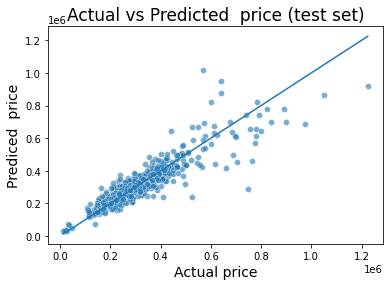

In [21]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Prediced  price', fontsize=14)
plt.title('Actual vs Predicted  price (test set)', fontsize=17)
plt.show()

In [22]:
#Checking Accuracy
np.round(RF_regression.score(X_test, y_test),4)

0.8364

In [23]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

46624.02

In [24]:
#Tuning Hyper Parameters 
my_param_grid = {'n_estimators': [10,100,500], 'max_features':['sqrt','log2'], 'max_depth':[5,10,20]}

In [26]:
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.2s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.5s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END ...max_depth=5, max_features=sqrt, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1000),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

In [27]:
grid.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}

In [28]:
grid.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=1000)

In [29]:
y_hat_optimized = grid.predict(X_test)

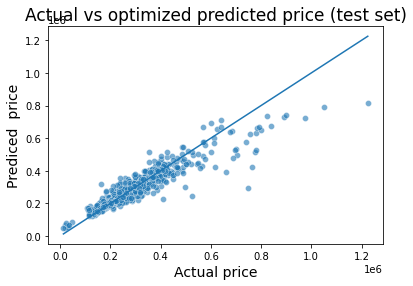

In [30]:
sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Prediced  price', fontsize=14)
plt.title('Actual vs optimized predicted price (test set)', fontsize=17)
plt.show()

In [31]:
np.round(grid.score(X_test, y_test),4)

0.85

In [32]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

44634.05

In [33]:
#Random Forest can also be used for Feature Selection
features = list(X_train.columns)
features

['DOM',
 'Garage Capacity',
 'HOA Fee',
 'Irregular Shape',
 'Quadrant',
 'School District',
 'Sold Terms',
 'Total Bedrooms',
 'Total Bathrooms',
 'Total Square Feet',
 'Year Built',
 'Zip',
 'year_sold',
 'month_sold',
 'built_after_2000']

In [34]:
RF_Regressor = RandomForestRegressor(n_estimators = 500, max_features='sqrt', max_depth=20, random_state= rand_state)
RF_Regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=1000)

In [35]:
importance = RF_Regressor.feature_importances_
importance

array([0.0413, 0.1561, 0.0407, 0.0125, 0.0207, 0.017 , 0.0269, 0.0903, 0.1171, 0.3262, 0.0557,
       0.0277, 0.0273, 0.0267, 0.0138])

In [36]:
#Displaying List of Important Features
FIM = pd.DataFrame({'Features': features, 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
3,Irregular Shape,0.012466
14,built_after_2000,0.013762
5,School District,0.017048
4,Quadrant,0.020653
13,month_sold,0.026675
6,Sold Terms,0.026874
12,year_sold,0.027349
11,Zip,0.027711
2,HOA Fee,0.040684
0,DOM,0.041279


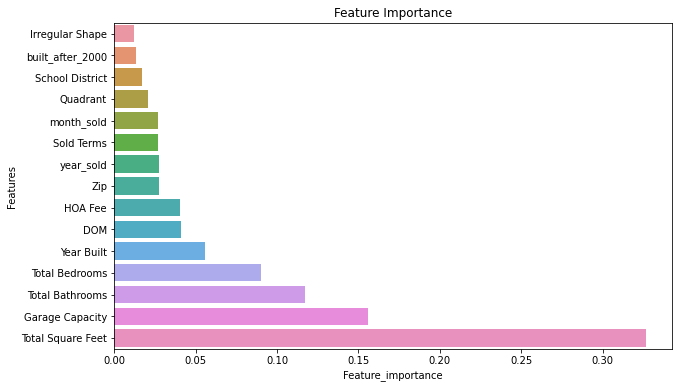

In [37]:
#Important Features Plot
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()